In [18]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [43]:
exp='exp class synthetic'
if exp=='exp reg synthetic':
    #folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    #folder = 'exps77/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-11 12:37:04.184427'
    folder = 'exps77/exp_duality_gap_MAC/exp1/'
    T=500
    x_right=300
elif exp =='exp class synthetic':
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-08 22%3a00%3a35.758740'
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n10val_perc0.0-2019-02-08 11%3a16%3a06.897500'
    folder = 'exps77/exp_duality_gap_MAC/exp2/'
    T=500
    x_right=300
elif exp =='lenk regression':
    #folder = 'exps77/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 14:48:50.964294/'
    folder = 'exps77/exp_duality_gap_MAC/expLenkReg/'
    T=100
    x_right=100
elif exp =='lenk classification':
    #folder = 'exps77/grid_searchexpLenkn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 18:54:20.948679'
    folder = 'exps77/exp_duality_gap_MAC/expLenkClass/'
    T=100
    x_right=100

title=''
metric='loss'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'': get_file(starts_with=starts_with)}
    print(metrics)
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [44]:
put_in_dict('ITL-tsssubgd', 'ITL', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL', 'c')

if not 'lenk' in exp:
    put_in_dict('MEAN-tsssubgd', 'MEAN', 'orange')

{'': array([0.84939388, 0.85084305, 0.86455835, 0.84960294, 0.85971564,
       0.84103952, 0.85172976, 0.8609066 , 0.86113965, 0.87110036])}
-----------ITL- mean std 0.8560029756142074 0.008478038640430062
{'': array([[0.84985439, 0.86348302, 0.85627063, ..., 0.85678349, 0.8652422 ,
        0.86673337],
       [0.77784089, 0.80264637, 0.79911051, ..., 0.78345883, 0.8186271 ,
        0.78976015],
       [0.74776213, 0.76527196, 0.77046948, ..., 0.70816342, 0.77593774,
        0.72497486],
       ...,
       [0.11124249, 0.11451708, 0.11467314, ..., 0.11400902, 0.10927888,
        0.10675258],
       [0.11209837, 0.11452594, 0.11465364, ..., 0.11398473, 0.10926911,
        0.10662682],
       [0.11203426, 0.11452133, 0.11465919, ..., 0.11396077, 0.10925996,
        0.10680914]])}
-----------LTL- mean std 0.11132716130429712 0.0028304229014737264
{'': array([0.10033041, 0.10755089, 0.10143353, 0.09934216, 0.10177282,
       0.09930603, 0.10191097, 0.1067287 , 0.1023602 , 0.10018793])}
---

In [45]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=0.6
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    #plt.ylim(0.08, 0.14)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

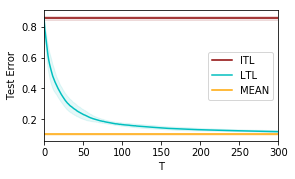

In [46]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+metric+'-T'+str(x_right))